In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/hi-born4/Bristlecone/person_detection


In [3]:
# !pip install ultralytics==8.0.196 --user

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.4 torch-2.3.0+cu121 CPU (Intel Core(TM) i5-10200H 2.40GHz)
Setup complete ✅ (8 CPUs, 31.1 GB RAM, 321.2/467.3 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [13]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

%pip install roboflow --user

from roboflow import Roboflow

rf = Roboflow(api_key="eoGf08ovlmiu8ffiuibp")
project = rf.workspace("persondetection-yjhnb").project("person-noz19")
version = project.version(1)
dataset = version.download("yolov8")

[WinError 2] The system cannot find the file specified: 'c:\\Users\\amarg\\OneDrive\\Desktop\\person_detection/datasets'
c:\Users\amarg\OneDrive\Desktop\person_detection


The syntax of the command is incorrect.
C:\Users\amarg\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


  Using cached roboflow-1.1.30-py3-none-any.whl.metadata (9.3 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl.metadata (2.2 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl.metadata (722 bytes)
  Using cached idna-2.10-py2.py3-none-any.whl.metadata (9.1 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
Using cached roboflow-1.1.30-py3-none-any.whl (75 kB)
Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
Using cached opencv_python_headless-4.8.0.74-cp37-abi3-win_amd64.whl (38.0 MB)
Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
Note: you may need to restart the kernel to use updated packages.
loading Ro


Extracting Dataset Version Zip to person-1 in yolov8:: 100%|██████████| 2728/2728 [00:00<00:00, 3898.35it/s]


## Custom Training

In [19]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

c:\Users\amarg\OneDrive\Desktop\person_detection


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
New https://pypi.org/project/ultralytics/8.2.22 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.9.0 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=c:\Users\amarg\OneDrive\Desktop\person_detection\person-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=Fa

c:\Users\amarg\OneDrive\Desktop\person_detection


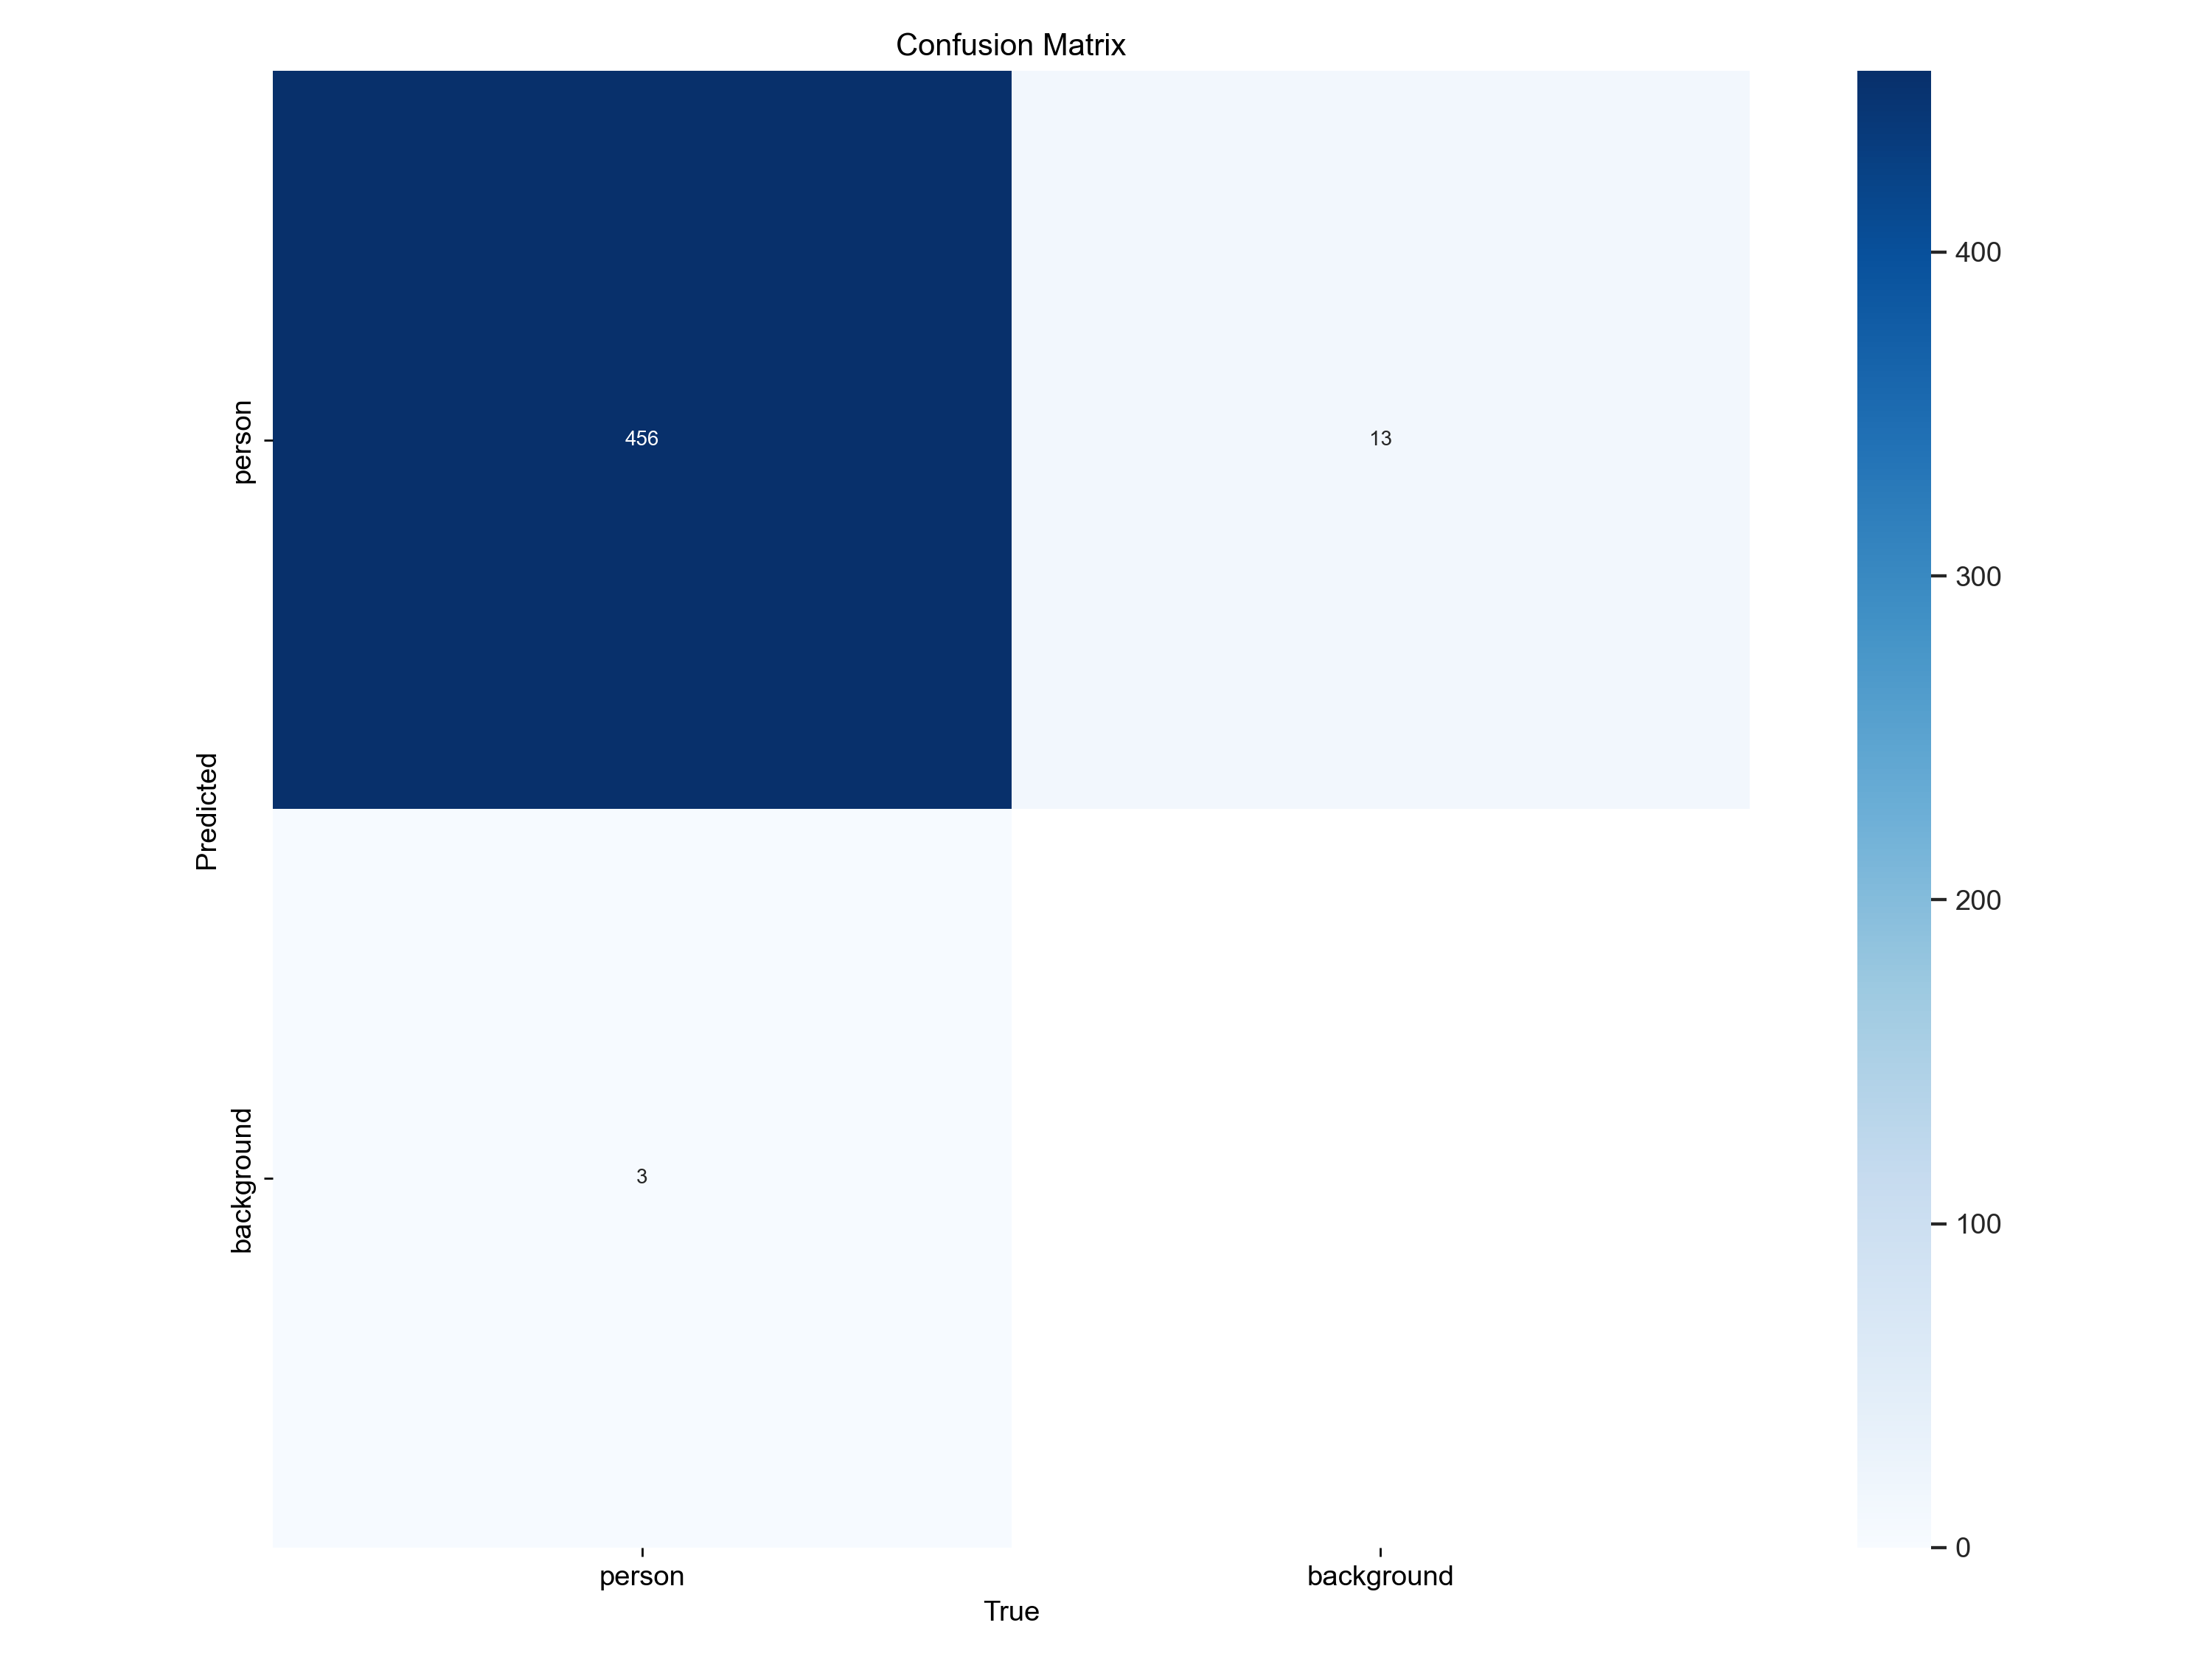

In [41]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

c:\Users\amarg\OneDrive\Desktop\person_detection


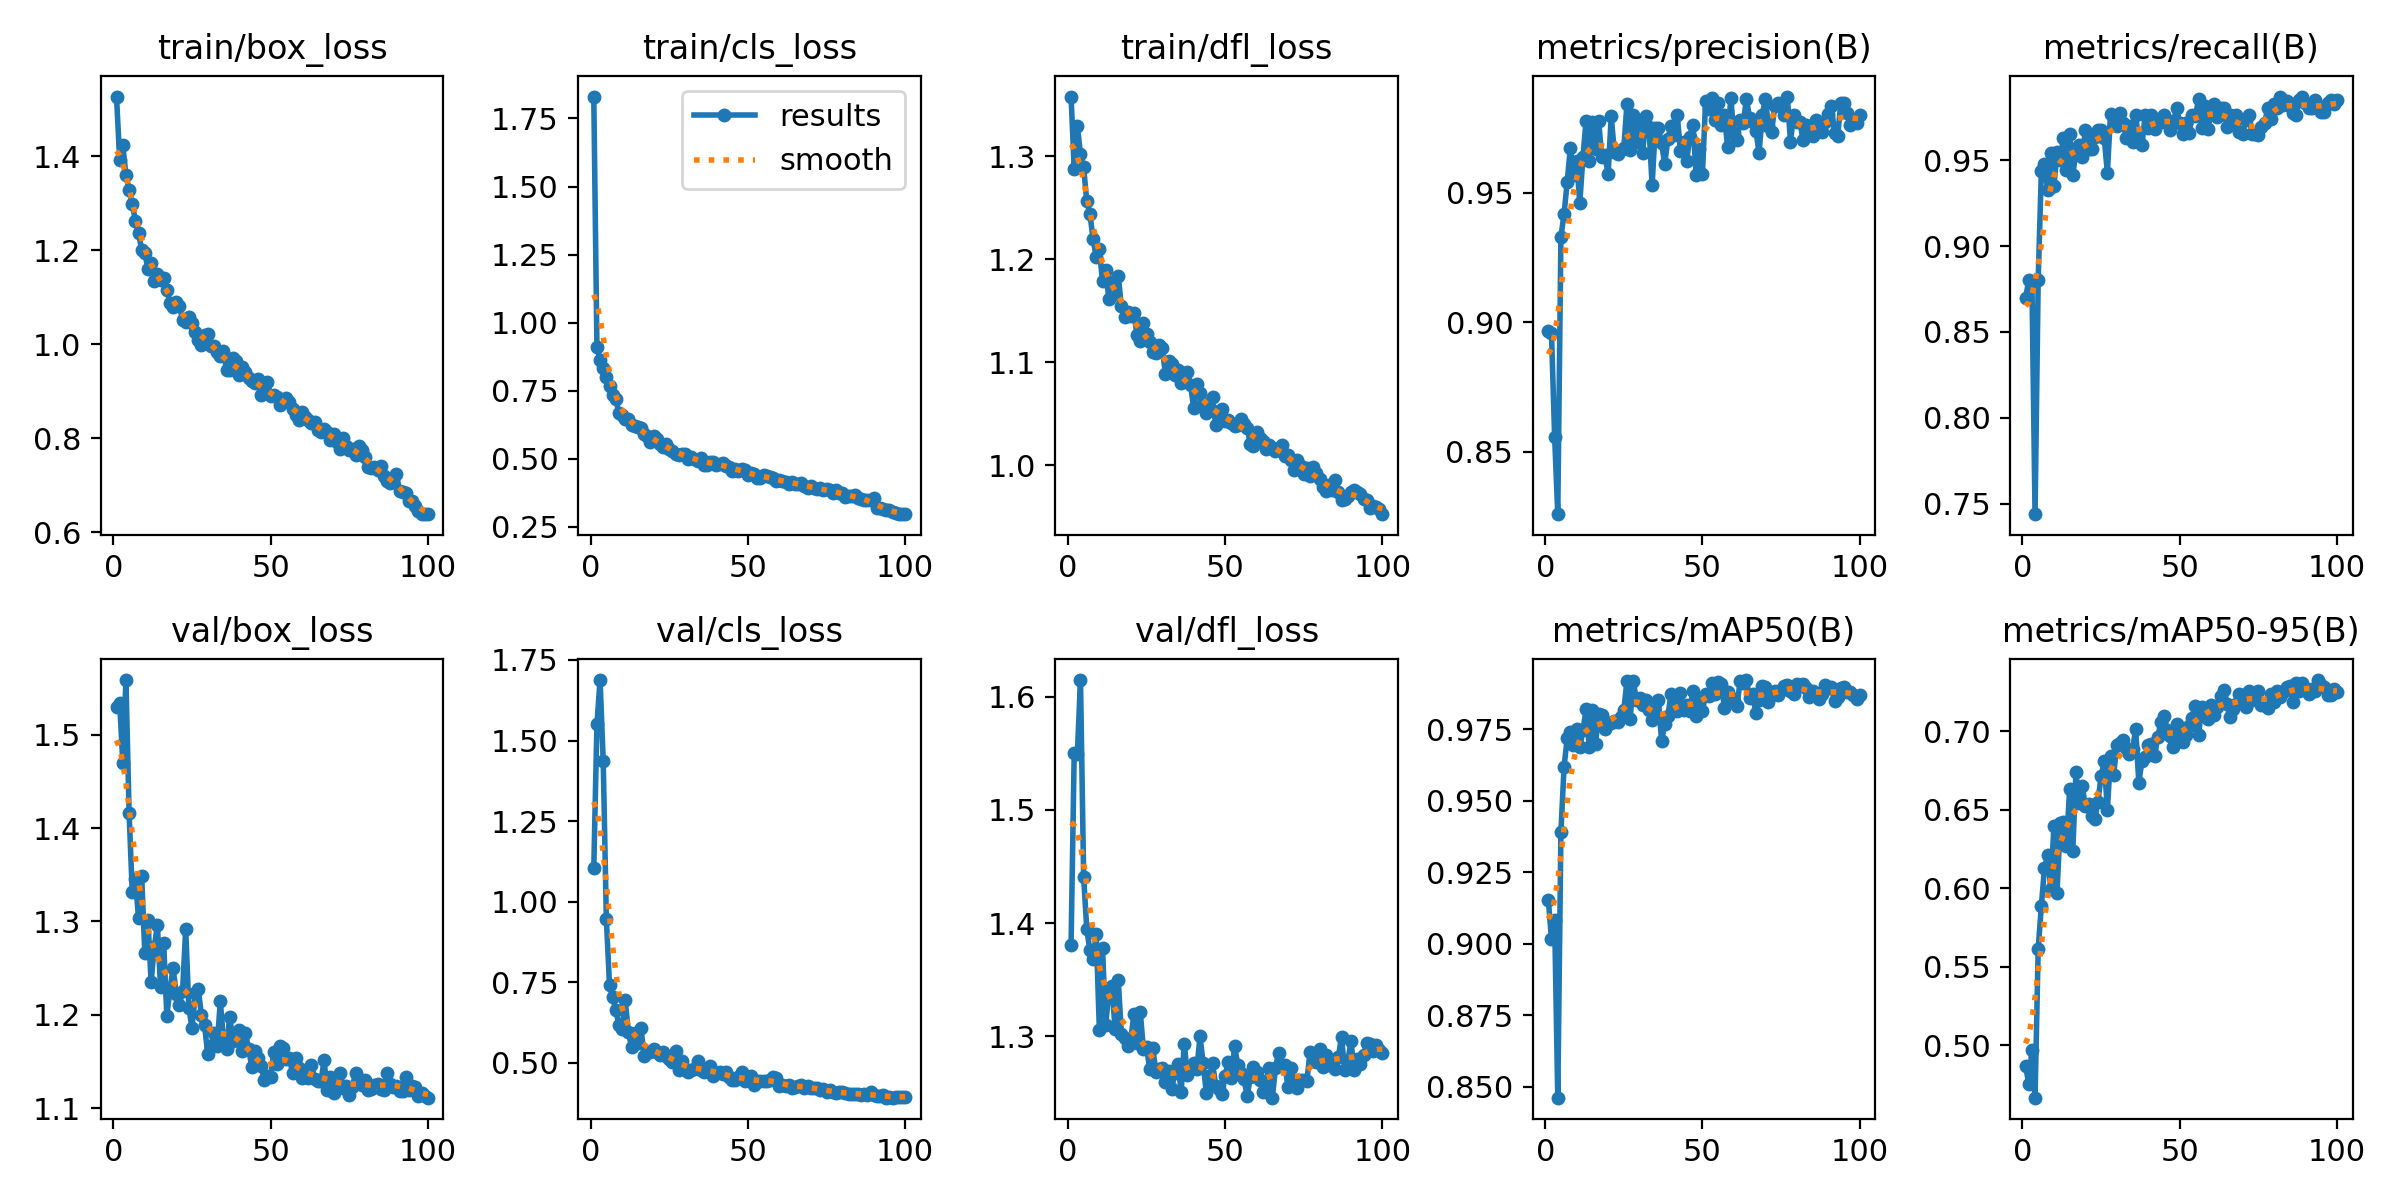

In [40]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

c:\Users\amarg\OneDrive\Desktop\person_detection


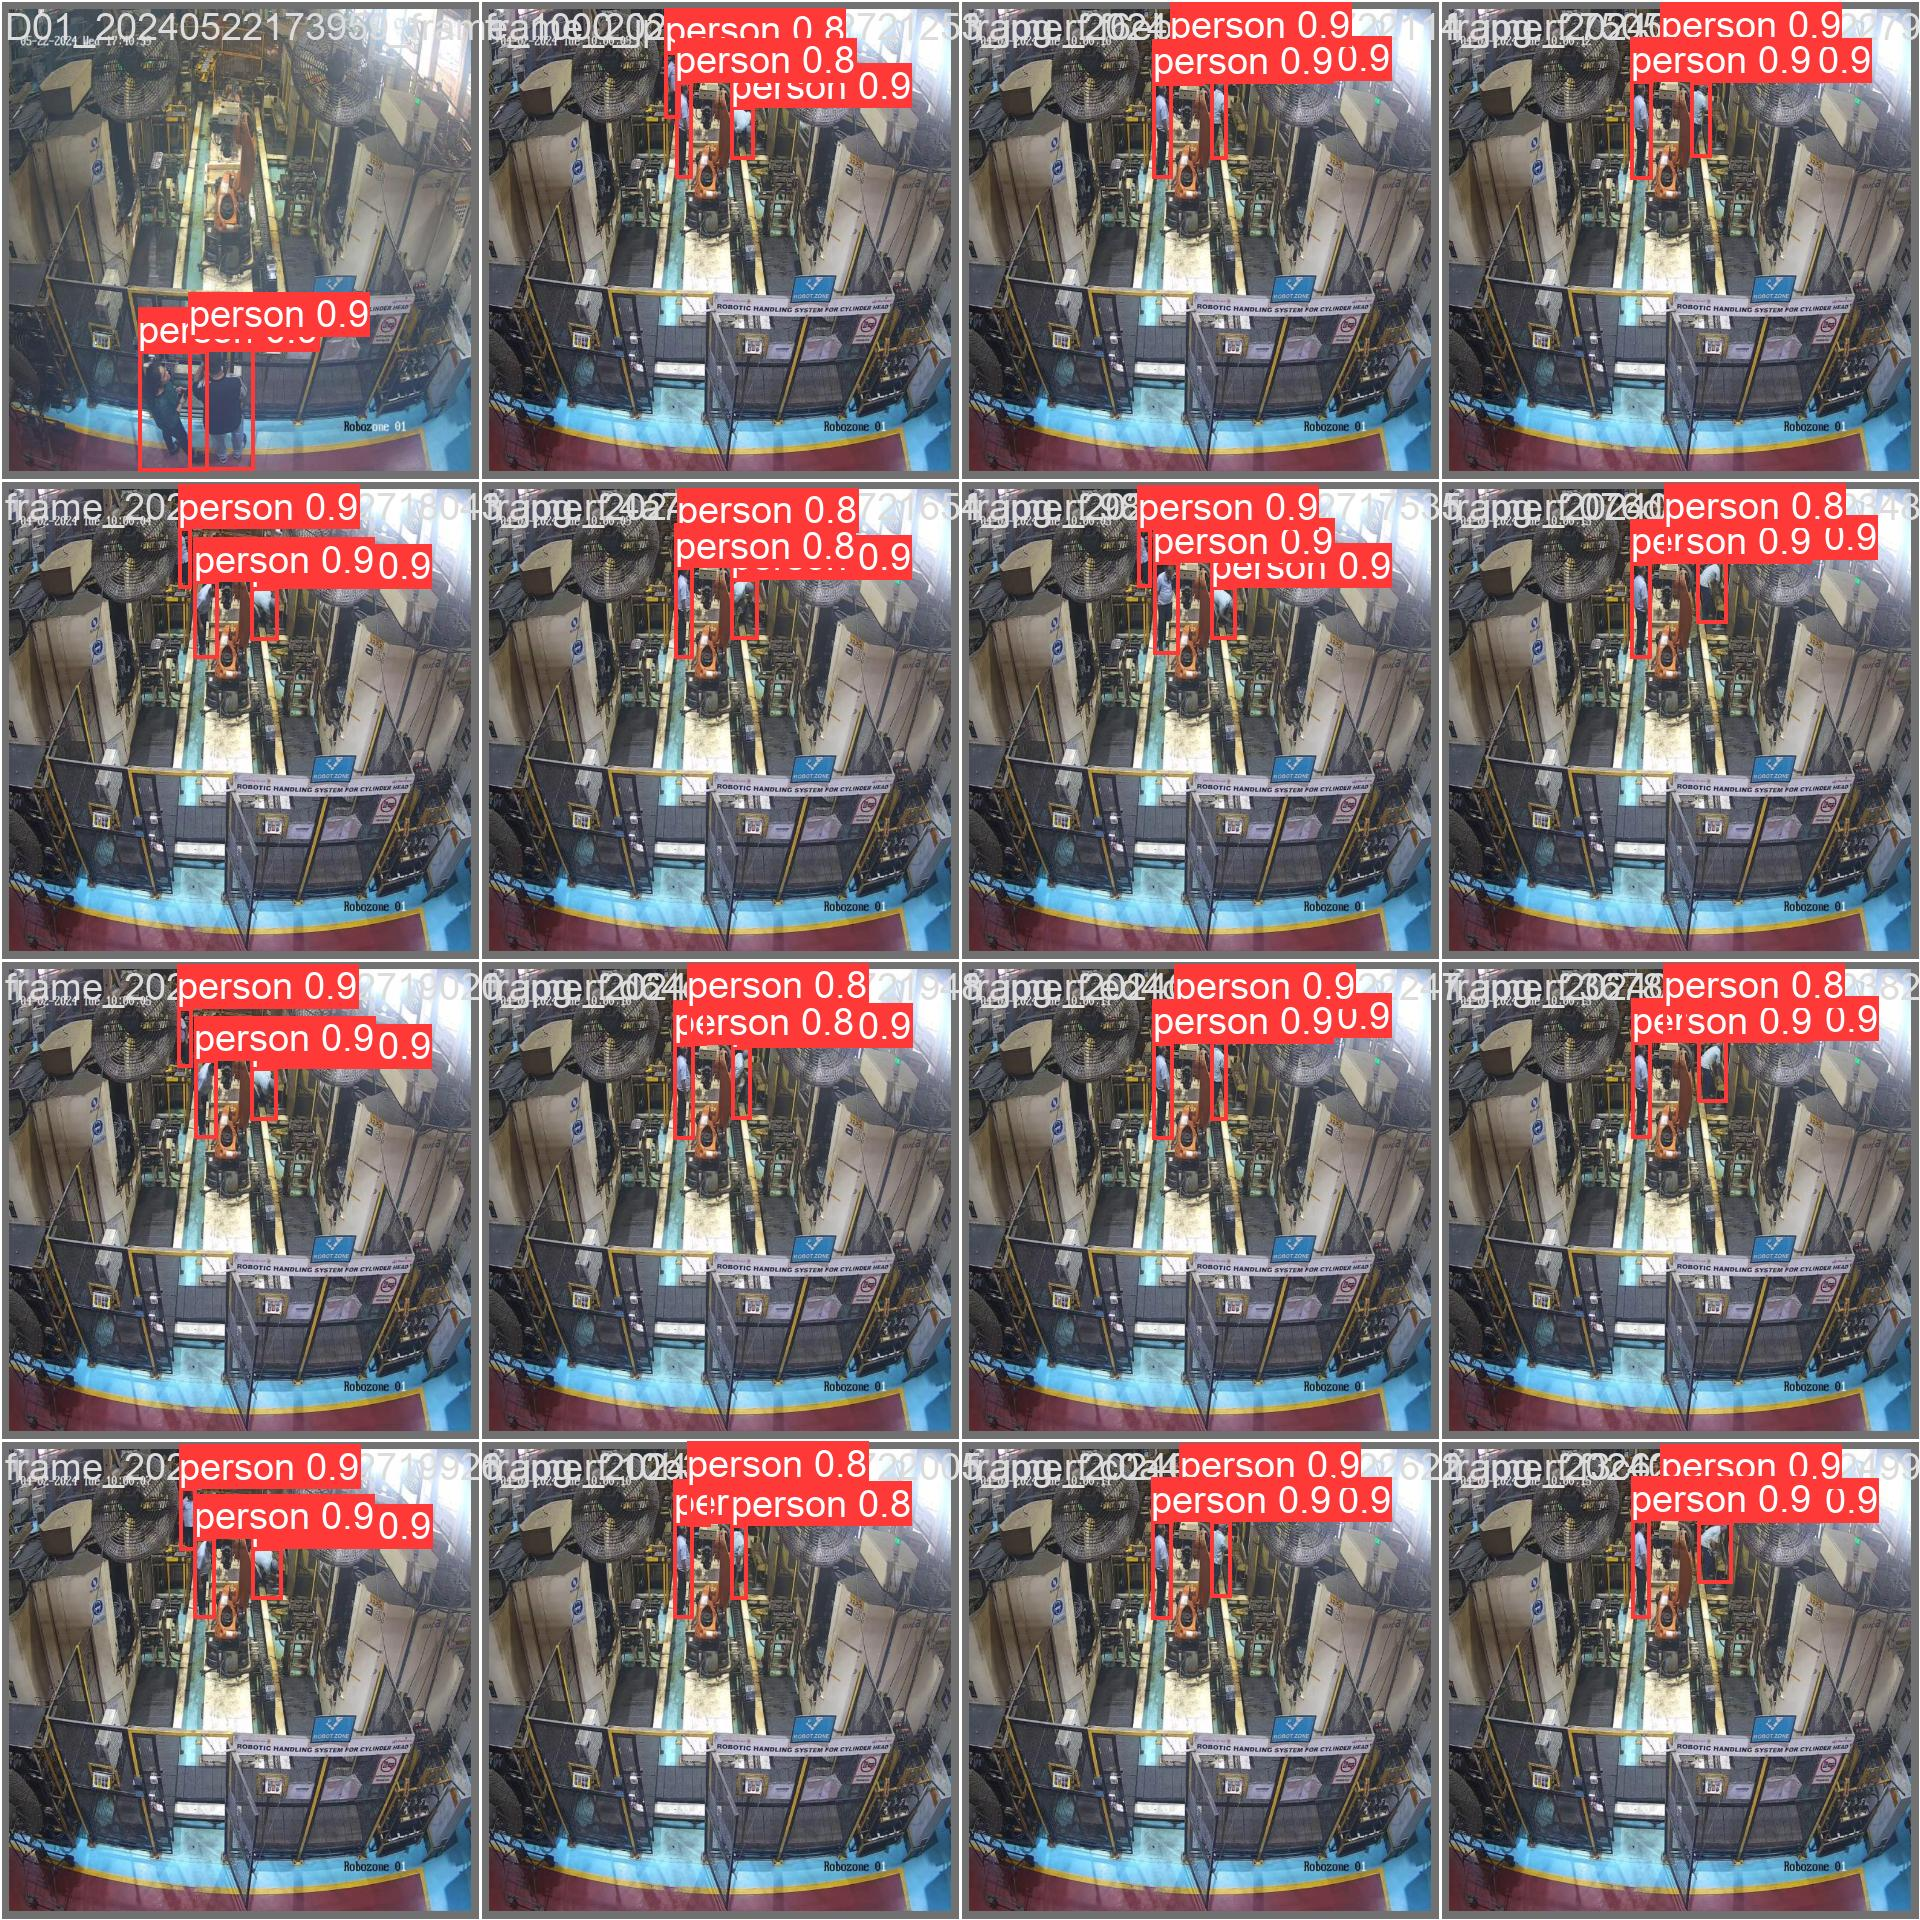

In [39]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [34]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

c:\Users\amarg\OneDrive\Desktop\person_detection


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
Ultralytics YOLOv8.0.196  Python-3.9.0 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12282MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

val: Scanning C:\Users\amarg\OneDrive\Desktop\person_detection\person-1\val\labels.cache... 180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<?, ?it/s]
val: Scanning C:\Users\amarg\OneDrive\Desktop\person_detection\person-1\val\labels.cache... 180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|▊         | 1/12 [00:00<00:08,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50

## Inference with Custom Model

In [36]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

c:\Users\amarg\OneDrive\Desktop\person_detection


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
Ultralytics YOLOv8.0.196  Python-3.9.0 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12282MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/90 c:\Users\amarg\OneDrive\Desktop\person_detection\person-1\test\images\D01_20240522173959_frame_1020_jpg.rf.d41504031422e7dd8d4931f19ce49680.jpg: 800x800 2 persons, 4.4ms
image 2/90 c:\Users\amarg\OneDrive\Desktop\person_detection\person-1\test\images\D01_20240522173959_frame_1050_jpg.rf.093356520a29063570bf7d602e64f1ce.jpg: 800x800 2 persons, 0.0ms
image 3/90 c:\Users\amarg\OneDrive\Desktop\person_detection\person-1\test\images\D01_20240522173959_frame_1140_jpg.rf.44a50cf82c02d4568809f56cfa42af74.jpg: 800x800 1 person, 6.3ms
image 4/90 c:\Users\amarg\OneDrive\Desktop\person_detection\person-1\test\images\D01_20240522173959_frame_1150_jpg.rf.e1f18e772f6e3d036a0dfe4e6b2306ae.jp

**NOTE:** Let's take a look at few results.

In [37]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [10]:
# !pip install -q git+https://github.com/THU-MIG/yolov10.git
# !pip install -q supervision roboflow
# !pip install ultralytics

from ultralytics import YOLO

model = YOLO('best.pt')

model.export(format='openvino')

AttributeError: Can't get attribute 'YOLOv10DetectionModel' on <module 'ultralytics.nn.tasks' from '/home/hi-born4/Bristlecone/person_detection/penv/lib/python3.11/site-packages/ultralytics/nn/tasks.py'>

In [3]:
# !pip install sahi ultralytics

!yolo task=detect mode=predict source="type_1_videos/D01_20240522173959.mp4" model=8s/detect/train3/weights/best.pt save=True

Ultralytics YOLOv8.1.34 🚀 Python-3.11.4 torch-2.3.0+cu121 CPU (Intel Core(TM) i5-10200H 2.40GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/2523) /home/hi-born4/Bristlecone/person_detection/type_1_videos/D01_20240522173959.mp4: 608x800 (no detections), 229.2ms
video 1/1 (frame 2/2523) /home/hi-born4/Bristlecone/person_detection/type_1_videos/D01_20240522173959.mp4: 608x800 (no detections), 215.6ms
video 1/1 (frame 3/2523) /home/hi-born4/Bristlecone/person_detection/type_1_videos/D01_20240522173959.mp4: 608x800 (no detections), 222.9ms
video 1/1 (frame 4/2523) /home/hi-born4/Bristlecone/person_detection/type_1_videos/D01_20240522173959.mp4: 608x800 (no detections), 210.4ms
video 1/1 (frame 5/2523) /home/hi-born4/Bristlecone/person_detection/type_1_videos/D01_20240522173959.mp4: 608x800 (no detections), 213.1ms
video 1/1 (frame 6/2523) /home/hi-born4/Bristlecone/person_detection/type_1_videos/D01_20240522173959.mp4: 608x800 (no de

In [28]:
from ultralytics import YOLO

# Path to the YOLOv8 model weights
MODEL_PATH = "8s/detect/train3/weights/best.pt"

# Path to the data configuration file
DATA_YAML_PATH = "datasets/person-1/data.yaml"

# Load the YOLOv8 model
model = YOLO(MODEL_PATH)

# Evaluate the model on the validation dataset
results = model.val(data=DATA_YAML_PATH)

# Print the results
print(results)


Ultralytics YOLOv8.0.196 🚀 Python-3.11.4 torch-2.3.0+cu121 CPU (Intel Core(TM) i5-10200H 2.40GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/hi-born4/Bristlecone/person_detection/datasets/person-1/val/labels... 180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<00:00, 1604.49it/s]
val: New cache created: /home/hi-born4/Bristlecone/person_detection/datasets/person-1/val/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [01:19<00:00,  6.58s/it]
                   all        180        459      0.985       0.98      0.991      0.731
Speed: 2.7ms preprocess, 422.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa49ebd4210>
fitness: 0.756665691537579
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.73063])
names: {0: 'person'}
plot: True
results_dict: {'metrics/precision(B)': 0.984924282936289, 'metrics/recall(B)': 0.9803921568627451, 'metrics/mAP50(B)': 0.9909647071827546, 'metrics/mAP50-95(B)': 0.730632467577004, 'fitness': 0.756665691537579}
save_dir: PosixPath('runs/detect/val4')
speed: {'preprocess': 2.6636468039618597, 'inference': 422.1828911039565, 'loss': 9.006924099392361e-05, 'postprocess': 0.5066500769721136}


In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred